**DATA ANALYSIS ON TITANIC DATASET**

# STEPS
Step1: Gathering Data
Step2: Data Preprocessing and Analyzing the data
Step3: Building models 
Step4: Make predictions on the unseen data

In [133]:
%matplotlib inline
%config IPCompleter.greedy=True

In [134]:
# importing libraries

# linear algebra
import numpy as np

# for data processing
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as srn


# for removing warnings
import warnings
warnings.filterwarnings('ignore')

# 1- DATA GATHERING

In [135]:
dataset=pd.read_csv('train.csv')
dataset.head(6)   # print the first 6 records of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [137]:
# check for duplicate entries
duplicate= dataset.duplicated()
print('no. of duplicate entries are {}'.format(duplicate.sum()))

no. of duplicate entries are 0


In [138]:
# CHECK FOR MISSING VALUES
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [139]:
# REMOPVING UNNECESSARY COLUMNS
dbf= dataset.drop(['PassengerId','Ticket','Name','Cabin'],axis=1) # drop cabin column as most of its entries are missing and other columns are irrelevant in prediction of survivors
dbf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Step2: Analyzing the data

In [140]:
# check for no. of survivors
dbf.Survived.value_counts(normalize=True) 

0    0.616162
1    0.383838
Name: Survived, dtype: float64

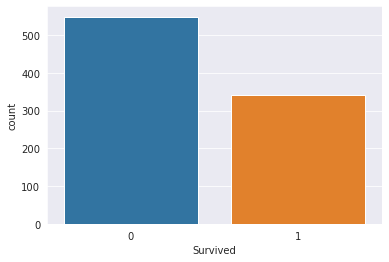

In [141]:
#plot for count vs survived; 0- died & 1- survived
srn.countplot('Survived',data=dbf)
srn.set_style("darkgrid")

In [142]:
#survivors as per gender
pd.crosstab(dbf.Survived, dbf.Sex, normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


Text(0.5, 1.0, 'Survival by Gender')

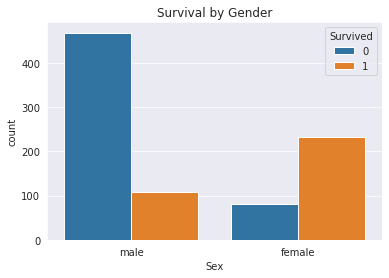

In [143]:
# plot for male and female survived
srn.countplot('Sex', hue="Survived", data=dbf).set_title('Survival by Gender')

In [144]:
# check for survival rate as per socio-economic status i.e. Pclass
dbf.groupby(['Pclass'])['Survived'].sum()/dbf.groupby(['Pclass'])['Survived'].count()*100 

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival by Passenger Class')

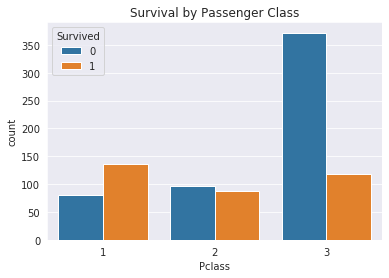

In [145]:
# Plot for survival count by Pclass 
srn.countplot('Pclass', hue='Survived', data=dbf).set_title('Survival by Passenger Class')

Text(0.5, 0.98, ' Class and gender wise segregation of passengers')

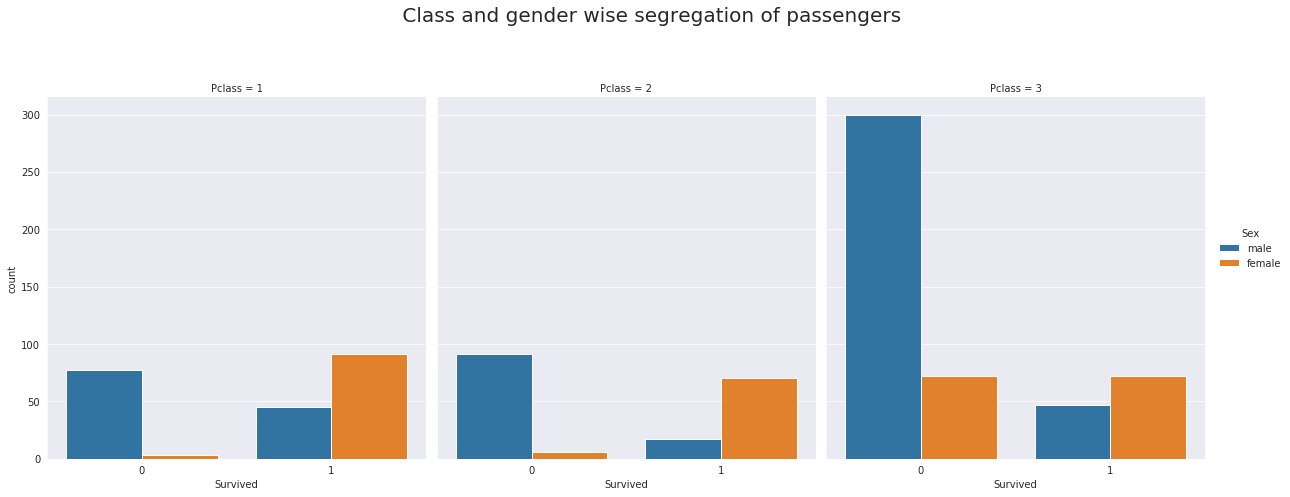

In [146]:
# plot for class and gender wise, survival count
g=srn.catplot('Survived', col='Pclass', hue='Sex', data=dbf, kind='count', height=7, aspect=.8)
plt.subplots_adjust(top=0.8)
g.fig.suptitle(' Class and gender wise segregation of passengers', fontsize=20)


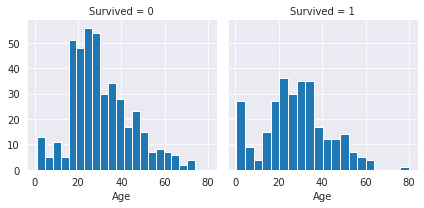

In [147]:
# plot for age factor
srn.FacetGrid(dbf, col='Survived').map(plt.hist, 'Age',bins=20)

In [148]:
# looking at the youngest and oldest to survive
youngest_died= dbf[dbf['Survived']== False]['Age'].min()
youngest_survived = dbf[dbf['Survived']== True]['Age'].min()
oldest_survived = dbf[dbf['Survived']==True]['Age'].max()
oldest_died = dbf[dbf['Survived']== False]['Age'].max()
print('youngest to die: {} \nyoungest to survive: {} \noldest to survive: {} \noldest to die: {}\n'.format(youngest_died,youngest_survived,oldest_survived,oldest_died))

youngest to die: 1.0 
youngest to survive: 0.42 
oldest to survive: 80.0 
oldest to die: 74.0



In [ ]:
# plot for male and female survived
g=srn.catplot(x='Survived', y='Age', hue="Sex", data=dbf, kind='box', height=7, aspect=0.8)
g.set_axis_labels('Survivors', 'Age of Passengers')
plt.title('Age distriution of Survivors VS Non Survivors by Gender', fontsize=16)

In [ ]:
# Embarked effect on survival rate
pd.crosstab(dbf.Survived, dbf.Embarked, normalize=True)

In [ ]:
# plot for the  survival count vs Embarked i.e. port
srn.countplot('Embarked', hue='Survived', data=dbf).set_title('Survival Count as per Port of Embarkation')

In [ ]:
# plot including Pclass, Embarked and Gender variables
srn.factorplot('Embarked', 'Survived', hue='Sex', col='Pclass', data=dbf)

In [ ]:
# plot for fare distribution
plt.figure(figsize=(15,8))
srn.kdeplot(dbf['Fare'][dbf.Survived == 0], color ='turquoise', shade=True)
srn.kdeplot(dbf['Fare'][dbf.Survived== 1], color = 'coral', shade=True)
plt.title('Density plot for Fare distribution of Survivors vs. Non-Survivors')
plt.legend(['Survived = 0', 'Survived = 1'])
plt.show()


In [ ]:
# to see how embarkation vary across different ports
g=srn.lmplot('Age','Fare', data= dbf, fit_reg=False, hue='Pclass', height=7, scatter_kws={'marker': ".","s": 20})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('SCATTERPLOT OF PASSENGERS W.R.T. FARE AND AGE', fontsize=16)

In [ ]:
g=srn.lmplot('Age', 'Fare', data=dbf, fit_reg= False, hue='Pclass', col='Embarked',scatter_kws={'marker': '.','s': 20})
plt.subplots_adjust(top=0.8)
g.fig.suptitle('SCATTERPLOT OF PASSENGERS W.R.T FARE AND AGE FOR DIFFERENT PORTS', fontsize=16)

In [ ]:
# PLOT FOR  NO. OF PASSENGER SURVIVED VS FAMILY SIZE 

# adding a column Family_size
dbf['Family_size']=0
dbf['Family_size']= dbf['Parch']+dbf['SibSp']

# Adding a column alone
dbf['Alone']=0
dbf.loc[dbf.Family_size==0, 'Alone']= 1

srn.barplot(x='Family_size', y="Survived", data=dbf).set_title('Survive Rate AS Per Family_Size')

Text(0.5, 1.0, 'Tavelling alone VS With Family')

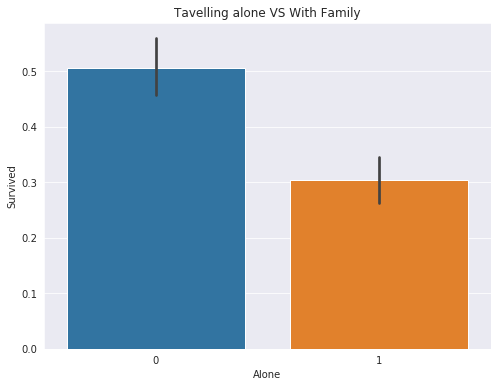

In [104]:
plt.figure(figsize=(8,6))
srn.barplot(x='Alone', y='Survived', data=dbf).set_title('Tavelling alone VS With Family')

FROM ABOVE ANALYSIS WE CONCLUDE THAT BEING A FEMALE WITH UPPER SOCIO-ECONOMIC STATUS WOULD GIVE ONE THE BEST CHANCE OF SURVIVAL WHEN TRAGEDY OCCUR ON TITANIC


## Step2-(b)PREPROCESSING  the DATA

In [105]:
#  check for null values
dbf.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Family_size      0
Alone            0
dtype: int64

In [106]:
dbf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Alone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [107]:
# mean and median of age
dbf['Age'].median(skipna=True)


28.0

In [108]:
dbf['Age'].mean(skipna=True)

29.69911764705882

In [109]:
dbf.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [110]:
# FILL IN MISSING VALUES
dbf['Age'].fillna(28, inplace=True) # since mean is greater than median
dbf['Embarked'].fillna('S', inplace=True)  # S port is the most occuring port of embarkation

In [111]:
# check for missing values
dbf.isnull().any()


Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Family_size    False
Alone          False
dtype: bool

In [112]:
# creating categorical variable for different features
tr=dbf
# create buckets for Age
tr['Age_cat']=0
tr.loc[tr['Age_cat']<=12, 'Age']=0
tr.loc[(tr['Age_cat']>12)&(tr['Age']<=20), 'Age']=1
tr.loc[(tr['Age_cat']>20)&(tr['Age']<=35), 'Age']=2
tr.loc[(tr['Age_cat']>35)&(tr['Age']<=50), 'Age']= 3
tr.loc[(tr['Age_cat']>50), 'Age']=4

# creating bucket for fare
tr['Fare_cat']=0
tr.loc[tr['Fare_cat']<=8, 'Fare']=0
tr.loc[(tr['Fare_cat']>8)&(tr['Fare']<=16), 'Fare']=1
tr.loc[(tr["Fare_cat"]>16)&(tr['Fare']<=32), 'Fare']=2
tr.loc[(tr['Fare_cat']>32), 'Fare']=3

# creating bucket for embarkation
tr['Port']=0
tr.loc[tr['Embarked']=='S', 'Port']=0
tr.loc[tr['Embarked']=='C', 'Port']=1
tr.loc[tr['Embarked']=='Q', 'Port']=2

# creating bucket for sex variable
tr['Gender']=0
tr.loc[tr['Sex'] == 'male', 'Gender']=0
tr.loc[tr['Sex'] == 'female', 'Gender']=1



In [113]:
# creating a new variable family and buckets for the same as travel_company
tr['Family']= tr['SibSp'] + tr['Parch']+1
tr['Travel_company']=0
tr.loc[tr['Family']<=1, 'Travel_company']=0
tr.loc[(tr['Family']>1)&(tr['Family']<=4), 'Travel_company']=1
tr.loc[(tr['Family']>4), 'Travel_company']=2

In [114]:
# Removing the unnecessary variables 

tr.drop(['SibSp', 'Parch','Sex','Age','Embarked', 'Alone','Fare','Family','Family_size'], axis=1 , inplace= True)
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived          891 non-null int64
Pclass            891 non-null int64
Age_cat           891 non-null int64
Fare_cat          891 non-null int64
Port              891 non-null int64
Gender            891 non-null int64
Travel_company    891 non-null int64
dtypes: int64(7)
memory usage: 48.8 KB


In [115]:
tr.head()

,Survived,Pclass,Age_cat,Fare_cat,Port,Gender,Travel_company
0,0,3,0,0,0,0,1
1,1,1,0,0,1,1,1
2,1,3,0,0,0,1,0
3,1,1,0,0,0,1,1
4,0,3,0,0,0,0,0


### Step3- Model building

In [116]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived          891 non-null int64
Pclass            891 non-null int64
Age_cat           891 non-null int64
Fare_cat          891 non-null int64
Port              891 non-null int64
Gender            891 non-null int64
Travel_company    891 non-null int64
dtypes: int64(7)
memory usage: 48.8 KB


In [117]:
tr.head()

,Survived,Pclass,Age_cat,Fare_cat,Port,Gender,Travel_company
0,0,3,0,0,0,0,1
1,1,1,0,0,1,1,1
2,1,3,0,0,0,1,0
3,1,1,0,0,0,1,1
4,0,3,0,0,0,0,0


In [118]:
#separating the response 'y' and input variables 'x'
x=tr.iloc[:,1:6].values
y=tr.iloc[:,0].values
print(x)

[[3 0 0 0 0]
 [1 0 0 1 1]
 [3 0 0 0 1]
 ...
 [3 0 0 0 1]
 [1 0 0 1 0]
 [3 0 0 2 0]]


In [119]:
# splitting the dataset into train and test with 80% for training model
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
#print(x_test)

 **USING LOGISTIC REGRESSION**

In [120]:
# building the logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
# testing the model 
y_predict= logreg.predict(x_test)
acc_logistic_regression = metrics.accuracy_score(y_predict,y_test)
print('The Logistic Regression model accuracy is', metrics.accuracy_score(y_predict,y_test))

The Logistic Regression model accuracy is 0.7486033519553073


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       108
           1       0.70      0.65      0.67        71

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



**USING RANDOM FOREST MODEL**

In [123]:
from sklearn.ensemble import RandomForestClassifier
randfor= RandomForestClassifier( max_depth=6, min_samples_split=2, n_estimators= 100, random_state=1)
randfor.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [124]:
# testing the random forest model
y_pred=randfor.predict(x_test)
acc_random_forest = metrics.accuracy_score(y_pred,y_test)
print('The  Random Forest model accuracy is', metrics.accuracy_score(y_pred,y_test))

The  Random Forest model accuracy is 0.8268156424581006


In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       108
           1       0.92      0.62      0.74        71

    accuracy                           0.83       179
   macro avg       0.86      0.79      0.80       179
weighted avg       0.84      0.83      0.82       179



**USING KNeighboursClassifier**

In [126]:
# training the model
from sklearn.neighbors import KNeighborsClassifier
clas = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clas.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [127]:
y_pred= clas.predict(x_test)
acc_KNN = metrics.accuracy_score(y_pred, y_test)
print('The  KNeighborsClassifier model accuracy is', metrics.accuracy_score(y_pred,y_test))

The  KNeighborsClassifier model accuracy is 0.776536312849162


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       108
           1       0.83      0.55      0.66        71

    accuracy                           0.78       179
   macro avg       0.79      0.74      0.75       179
weighted avg       0.79      0.78      0.76       179



**Using Naive Bayes**

In [129]:
# training the naive bayes model
from sklearn.naive_bayes import GaussianNB
classification= GaussianNB();
classification.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [130]:
# testing the naive bayes model
y_pred= classification.predict(x_test)
acc_naive_bayes= metrics.accuracy_score(y_pred,y_test)
print('The Naive Bayes model accuracy is', metrics.accuracy_score(y_pred,y_test))

The Naive Bayes model accuracy is 0.7486033519553073


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       108
           1       0.70      0.65      0.67        71

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



In [132]:
# check for which model is best
data={'Model':['LogisticRegression', 'RandomForest','KNeighborsClassifier', 'NaiveBayes'], 'Score':[acc_logistic_regression, acc_random_forest, acc_KNN, acc_naive_bayes]}
results= pd.DataFrame(data)
print(results)


                  Model     Score
0    LogisticRegression  0.748603
1          RandomForest  0.826816
2  KNeighborsClassifier  0.776536
3            NaiveBayes  0.748603


# 